In [1]:
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR, CosineAnnealingLR
from torch.optim import Adam
import matplotlib.pyplot as plt
import math

In [2]:
%load_ext matplotlib_inline

The matplotlib_inline module is not an IPython extension.


In [3]:
# fix a optimizer adam.

simple_model = nn.Sequential(
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 4)
)

adam_optim = Adam(params=simple_model.parameters(), lr=3e-4, betas=(0.9, 0.999))

In [7]:
# cosine annealing

def cosine_scheduler(curr_step, max_iters, min_lr=0, last_epoch=-1, init_lr = 3e-4):

    lr = min_lr + (init_lr - min_lr) * 0.5 * (
        1 + math.cos(math.pi * (curr_step / max(1, max_iters)))
    )
    return lr

In [31]:
def cosine_scheduler_with_warmup(curr_step, num_warmup_steps, max_iters, min_lr=0, last_epoch=-1, init_lr=3e-4, num_cycles=1):
    if curr_step <= num_warmup_steps:
        return init_lr * curr_step / max(1, num_warmup_steps)
    
    cosine_lr = min_lr + (init_lr - min_lr) * 0.5 * (1 + math.cos(math.pi * (float(num_cycles) * ((curr_step - num_warmup_steps)/ max(1, max_iters - num_warmup_steps))) % 1))

    return max(0.0, cosine_lr)

In [5]:
def lr_lambda(current_step, num_warmup_steps=2000, num_training_steps=30000, num_cycles=1):
    if current_step < num_warmup_steps:
        return float(current_step) / float(max(1, num_warmup_steps))
    progress = float(current_step - num_warmup_steps) / float(
        max(1, num_training_steps - num_warmup_steps)
    )
    if progress >= 1.0:
        return 0.0
    return max(
        0.0, 0.5 * (1.0 + math.cos(math.pi * ((float(num_cycles) * progress) % 1.0)))
    )

[0.0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295, 0.03, 0.0305, 0.031, 0.0315, 0.032, 0.0325, 0.033, 0.0335, 0.034, 0.0345, 0.035, 0.0355, 0.036, 0.0365, 0.037, 0.0375, 0.038, 0.0385, 0.039, 0.0395, 0.04, 0.0405, 0.041, 0.0415, 0.042, 0.0425, 0.043, 0.0435, 0.044, 0.0445, 0.045, 0.0455, 0.046, 0.0465, 0.047, 0.0475, 0.048, 0.0485, 0.049, 0.0495, 0.05, 0.0505, 0.051, 0.0515, 0.052, 0.0525, 0.053, 0.0535, 0.054, 0.0545, 0.055, 0.0555, 0.056, 0.0565, 0.057, 0.0575, 0.058, 0.0585, 0.059, 0.0595, 0.06, 0.0605, 0.061, 0.0615, 0.062, 0.0625, 0.063, 0.0635, 0.064, 0.0645, 0.065, 0.0655, 0.066, 0.0665, 0.

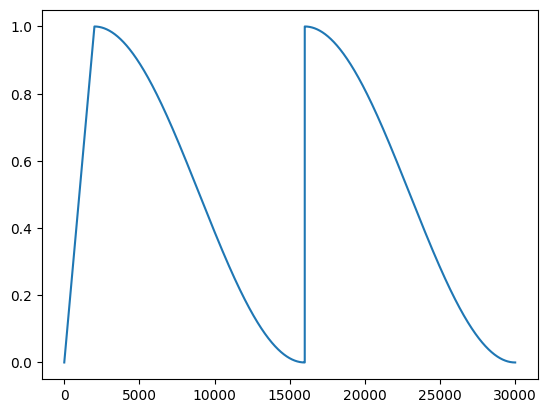

In [33]:
max_lr = 3e-4
lr_vals = []
for iter in range(30000):
    # lr = cosine_scheduler(
    #     iter + 1,
    #     4000,
    #     0,
    #     -1,
    #     lr
    # )
    # lr = cosine_scheduler_with_warmup(iter, 2000, 30000, 0, -1, max_lr, num_cycles=2)
    lr = lr_lambda(
        iter,
        num_warmup_steps=2000,
        num_training_steps=30000,
        num_cycles=2
    )
    lr_vals.append(lr)


# plot the lr values

# lr_vals
print(lr_vals)
plt.plot(lr_vals)

In [ ]:
lambda_lr = LambdaLR(adam_optim, lr_lambda=cosine_scheduler_with_warmup, last_epoch=-1)